# Making Business recommendations based on Data Project

As an analyst at a big online store, in this project my task is to prioritize the hypotheses that were made, launch an A/B test, and analyze the results.

## Data preparation 

In [49]:
# Loading all the libraries i will use:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import math 
from functools import reduce
from scipy import stats as st
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px

import plotly.graph_objects as go
import plotly.offline
import requests
import io
plotly.offline.init_notebook_mode(connected=True)

The file hypotheses_us.csv contains nine hypotheses on boosting an online store's revenue with Reach, Impact, Confidence, and Effort specified for each.
My goal is to: 
1. Apply the ICE framework to prioritize hypotheses and sort them in descending order of priority.
2. Apply the RICE framework to prioritize hypotheses and sort them in descending order of priority.
3. Show how the prioritization of hypotheses changes when using RICE instead of ICE. 

## Prioritizing Hypotheses

In [50]:
#exploring the data 

    
# Downloading the csv file from my GitHub account

url = "https://raw.githubusercontent.com/yoav-karsenty/-Making-Business-Decisions-Based-On-Data-Project/main/hypotheses_us.csv"
download = requests.get(url).content

# Reading the downloaded content and turning it into a pandas dataframe

hypo = pd.read_csv(io.StringIO(download.decode('utf-8')),sep = ';')

pd.set_option("display.max_colwidth", -1)

hypo


,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1
5,Add a customer review page. This will increase the number of orders,3,2,2,3
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5


In [51]:
hypo.columns = hypo.columns.str.lower()

In [52]:

hypo['ICE'] = (hypo['impact']*hypo['confidence']) / hypo['effort']
hypo[['hypothesis','ICE']].reset_index().sort_values(by = 'ICE',ascending = False)

,index,hypothesis,ICE
8,8,Launch a promotion that gives users discounts on their birthdays,16.200000
0,0,Add two new channels for attracting traffic. This will bring 30% more users,13.333333
7,7,Add a subscription form to all the main pages. This will help you compile a mailing list,11.200000
6,6,Show banners with current offers and sales on the main page. This will boost conversion,8.000000
2,2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,7.000000
1,1,Launch your own delivery service. This will shorten delivery time,2.000000
5,5,Add a customer review page. This will increase the number of orders,1.333333
3,3,Change the category structure. This will increase conversion since users will find the products they want more quickly,1.125000
4,4,Change the background color on the main page. This will increase user engagement,1.000000


In [53]:
hypo['RICE'] = (hypo['reach'] *hypo['impact'] * hypo['confidence'])/hypo['effort']
hypo[['hypothesis','RICE']].sort_values(by = 'RICE',ascending = False)

,hypothesis,RICE
7,Add a subscription form to all the main pages. This will help you compile a mailing list,112.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,56.0
0,Add two new channels for attracting traffic. This will bring 30% more users,40.0
6,Show banners with current offers and sales on the main page. This will boost conversion,40.0
8,Launch a promotion that gives users discounts on their birthdays,16.2
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,9.0
1,Launch your own delivery service. This will shorten delivery time,4.0
5,Add a customer review page. This will increase the number of orders,4.0
4,Change the background color on the main page. This will increase user engagement,3.0


Using the ICE method of prioritising, the top hypotheses are 8,0 and 7.When using the RICE method of prioritising, the top hypotheses are 7,2 and 0. The change origins from the fact that when calculating RICE, we also multiply impact and confidence by reach, wich we dont do with the ICE method, but we still devide both by EFFORT. Hypotheses 7 and 2 have  high REACH values (10,8) so that is why they jumped ahead of the list when using RICE.

## A/B Test Analysis

Next, i want to analyze the results of an A/B test  described in the files orders_us.csv and visits_us.csv.


In [54]:
#exploring the orders df

    
# Downloading the csv file from my GitHub account

url = "https://raw.githubusercontent.com/yoav-karsenty/-Making-Business-Decisions-Based-On-Data-Project/main/orders_us.csv"
download_o = requests.get(url).content

# Reading the downloaded content and turning it into a pandas dataframe

orders = pd.read_csv(io.StringIO(download_o.decode('utf-8')))

# Printing out the first 5 rows of the dataframe
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [55]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [56]:
#exploring the visits df
 
# Downloading the csv file from my GitHub account

url = "https://raw.githubusercontent.com/yoav-karsenty/-Making-Business-Decisions-Based-On-Data-Project/main/visits_us.csv"
download_v = requests.get(url).content

# Reading the downloaded content and turning it into a pandas dataframe

visits = pd.read_csv(io.StringIO(download_v.decode('utf-8')))

# Printing out the first 5 rows of the dataframe

visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [57]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [58]:
#changing the date column into the right datetime type.
orders['date']= pd.to_datetime(orders['date'],dayfirst = True)
visits['date']= pd.to_datetime(visits['date'],dayfirst = True)

In [59]:
#checking if there are any users that were assigned to both A and B groups. Those users needs to be removed  
##as they will not help us get clean results for the A/B test
find = orders.groupby(['visitorId'])['group'].nunique().reset_index().sort_values(by ='group',ascending = False)
find_2 = find[find['group'] ==2]
find_2

,visitorId,group
639,2654030115,2
932,3891541246,2
950,3941795274,2
340,1404934699,2
84,351125977,2
954,3951559397,2
710,2927087541,2
958,3963646447,2
591,2458001652,2
960,3972127743,2


In [60]:
orders[orders['visitorId'] == 2458001652]

,transactionId,visitorId,date,revenue,group
133,3060563671,2458001652,2019-08-22,80.8,A
380,1177690313,2458001652,2019-08-25,40.7,B
454,3755354294,2458001652,2019-08-06,115.1,B
456,543654048,2458001652,2019-08-06,25.9,A
483,2280027650,2458001652,2019-08-06,105.8,B
611,1244084011,2458001652,2019-08-04,10.2,A
692,3586870909,2458001652,2019-08-09,85.4,B
727,3959083601,2458001652,2019-08-07,270.4,A
883,2412219836,2458001652,2019-08-05,40.2,B
916,527333943,2458001652,2019-08-08,85.4,B


In [61]:
#Filtering out those users
clean_orders = orders[~orders['visitorId'].isin(find_2['visitorId'])] 

clean_orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B


In [62]:
#grouping the data by date and group and getting the number of users and orders per day. this will help me later 
## with further calculations.
clean_orders =clean_orders.drop_duplicates()
grouped_data = clean_orders.groupby(['date','group']).agg({'revenue' : 'sum','transactionId' : pd.Series.nunique,'visitorId' : pd.Series.nunique}).reset_index()
grouped_data.columns = ['date','group','revenue','orders_per_day','users_per_day']
grouped_data

,date,group,revenue,orders_per_day,users_per_day
0,2019-08-01,A,2266.6,23,19
1,2019-08-01,B,967.2,17,17
2,2019-08-02,A,1468.3,19,18
3,2019-08-02,B,2568.1,23,22
4,2019-08-03,A,1815.2,24,24
...,...,...,...,...,...
57,2019-08-29,B,1681.2,15,15
58,2019-08-30,A,1228.9,9,8
59,2019-08-30,B,3286.8,21,21
60,2019-08-31,A,848.3,8,8


In [63]:
grouped_data = grouped_data.merge(visits, on = ['date','group'])

Next, I want to :
1. graph cumulative revenue by group. Make conclusions and conjectures.
2. Graph cumulative average order size by group
3. Graph the relative difference in cumulative average order size for group B compared with group A.

In [64]:
#Creating a df with cumulative data in order to plot
datesGroups = clean_orders[['date','group']].drop_duplicates()


ordersAggregated = datesGroups.apply(lambda x: clean_orders[np.logical_and(clean_orders['date'] <= x['date'], clean_orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

visitorsAggregated = datesGroups.apply(lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visits' : 'sum'}), axis=1).sort_values(by=['date','group'])

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])

cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'cumul_rev', 'cumul_visits']
cumulativeData.head(5)
cumulativeData['conversion'] = cumulativeData['orders'] / cumulativeData['cumul_visits']

cumulativeData['cum_avg_purchase_size'] = cumulativeData['cumul_rev'] / cumulativeData['orders']


In [65]:
cumulativeData.head(8)

,date,group,orders,buyers,cumul_rev,cumul_visits,conversion,cum_avg_purchase_size
0,2019-08-01,A,23,19,2266.6,719,0.031989,98.547826
1,2019-08-01,B,17,17,967.2,713,0.023843,56.894118
2,2019-08-02,A,42,36,3734.9,1338,0.031390,88.926190
3,2019-08-02,B,40,39,3535.3,1294,0.030912,88.382500
4,2019-08-03,A,66,60,5550.1,1845,0.035772,84.092424
5,2019-08-03,B,54,53,4606.9,1803,0.029950,85.312963
6,2019-08-04,A,77,71,6225.6,2562,0.030055,80.851948
7,2019-08-04,B,68,66,6138.5,2573,0.026428,90.272059


In [66]:
#merging all the data inro into one df
cumulativeData = cumulativeData.merge(grouped_data,on = ['date','group'],how = 'outer')
cumulativeData.head(10)

,date,group,orders,buyers,cumul_rev,cumul_visits,conversion,cum_avg_purchase_size,revenue,orders_per_day,users_per_day,visits
0,2019-08-01,A,23,19,2266.6,719,0.031989,98.547826,2266.6,23,19,719
1,2019-08-01,B,17,17,967.2,713,0.023843,56.894118,967.2,17,17,713
2,2019-08-02,A,42,36,3734.9,1338,0.031390,88.926190,1468.3,19,18,619
3,2019-08-02,B,40,39,3535.3,1294,0.030912,88.382500,2568.1,23,22,581
4,2019-08-03,A,66,60,5550.1,1845,0.035772,84.092424,1815.2,24,24,507
5,2019-08-03,B,54,53,4606.9,1803,0.029950,85.312963,1071.6,14,14,509
6,2019-08-04,A,77,71,6225.6,2562,0.030055,80.851948,675.5,11,11,717
7,2019-08-04,B,68,66,6138.5,2573,0.026428,90.272059,1531.6,14,13,770
8,2019-08-05,A,99,92,7623.6,3318,0.029837,77.006061,1398.0,22,22,756
9,2019-08-05,B,89,87,7587.8,3280,0.027134,85.256180,1449.3,21,21,707


In [67]:
cumulativeData['conversion_per_day'] = cumulativeData.orders_per_day / cumulativeData.visits

In [68]:
#Getting a df for each group
group_a = cumulativeData[cumulativeData['group']== 'A']
group_b = cumulativeData[cumulativeData['group']== 'B']

In [69]:
#Adding an average purchase size column for each group for each day, this will help me later.
group_a['avg_purchase_size'] = group_a.revenue / group_a.visits
group_b['avg_purchase_size'] = group_b.revenue / group_b.visits

group_b.tail()

,date,group,orders,buyers,cumul_rev,cumul_visits,conversion,cum_avg_purchase_size,revenue,orders_per_day,users_per_day,visits,conversion_per_day,avg_purchase_size
53,2019-08-27,B,473,456,71885.0,16523,0.028627,151.976744,1746.9,11,11,720,0.015278,2.426250
55,2019-08-28,B,495,476,72895.5,17177,0.028818,147.263636,1010.5,22,22,654,0.033639,1.545107
57,2019-08-29,B,510,490,74576.7,17708,0.028801,146.228824,1681.2,15,15,531,0.028249,3.166102
59,2019-08-30,B,531,511,77863.5,18198,0.029179,146.635593,3286.8,21,21,490,0.042857,6.707755
61,2019-08-31,B,548,528,79651.2,18916,0.028970,145.348905,1787.7,17,17,718,0.023677,2.489833


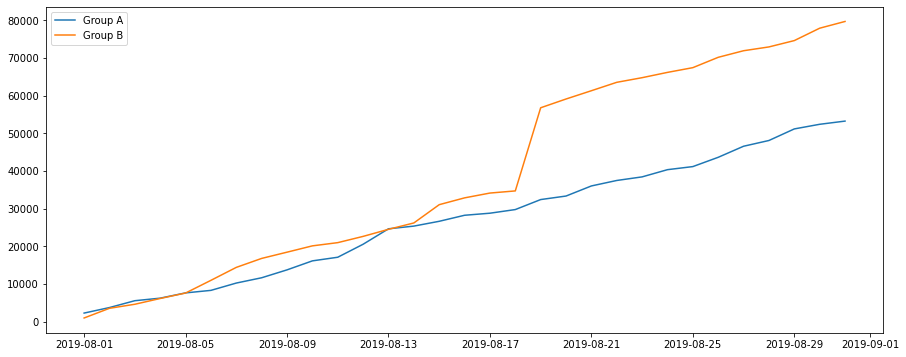

In [70]:
#Graphing cumulative revenue by group.
plt.rcParams["figure.figsize"] = (15,6)
plt.plot(group_a['date'],group_a['cumul_rev'],label = 'Group A')
plt.plot(group_b['date'],group_b['cumul_rev'],label = 'Group B')
plt.legend()
plt.show()

The cumulative metrics of group A  are consistently lower than those of group B. We can also see a big leap for group B after 17.8.21. This could be a resoult of an outlier - a visitor that made big purcheses for group B and distorted the graph. Lets see if that happens on the average purchase size graph too

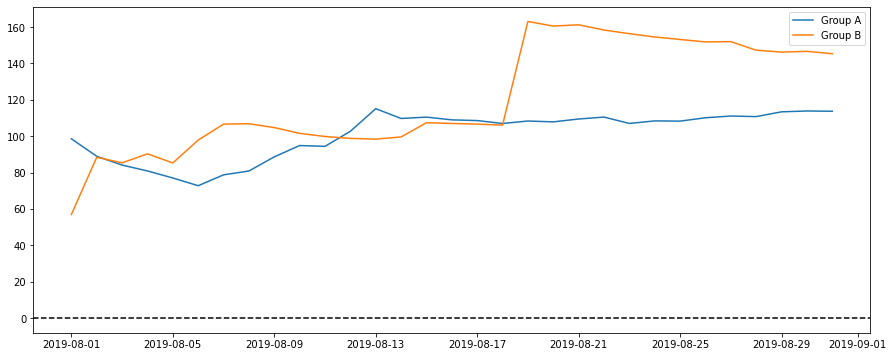

In [71]:
#Graphing cumulative average order size by group.

plt.plot(group_a['date'], group_a['cumul_rev']/group_a['orders'], label='Group A')
plt.plot(group_b['date'], group_b['cumul_rev']/group_b['orders'], label='Group B')
plt.axhline(y=0, color='black', linestyle='--') 
plt.legend() 


Average purchase size becomes steady after 13.08, expect for the huge bump fot group B of course. . The surge in group B in the second half of the test may have been due to the presence of large, expensive orders. We need more data on this group to make the right conclusions.

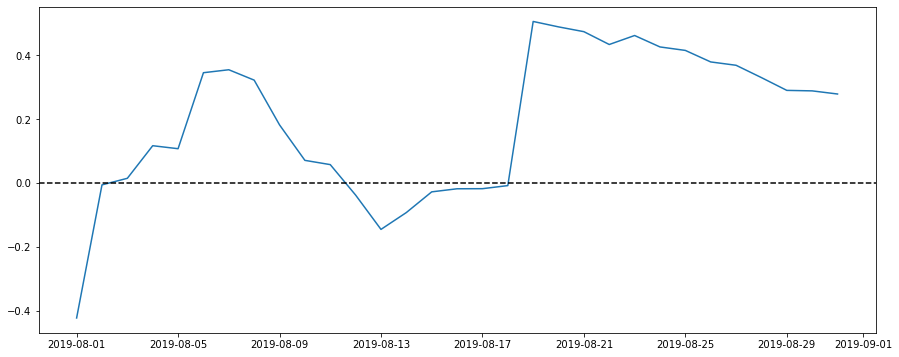

In [72]:
#Graphing the relative difference in cumulative average order size for group B compared with group A.


mergedCumulativeRevenue = group_a.merge(group_b, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
mergedCumulativeRevenue
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['cumul_revB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['cumul_revA']/mergedCumulativeRevenue['ordersA'])-1)

plt.axhline(y=0, color='black', linestyle='--') 

We can see that at several points the difference between the segments spikes. This means there must be some big orders and outliers. We'll find them later and adress them before making conclusions on the resuts of the A/B test 


Next, i want to calculate the conversion of each group as the ratio of orders to the number of visits for each day.

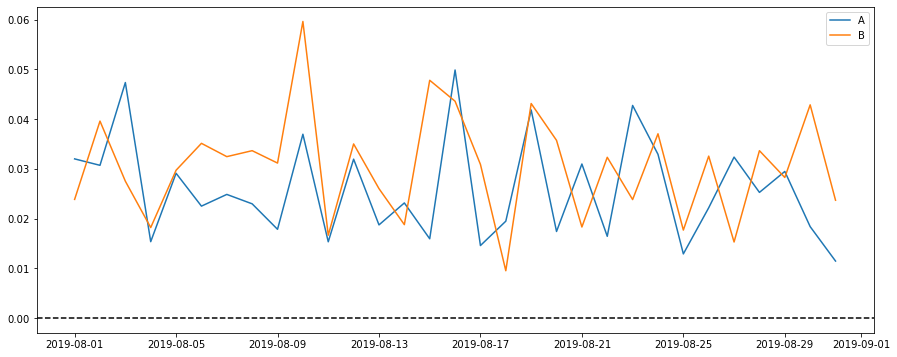

In [73]:
#calculating each group's conversion rate. 
##Plotting the daily conversion rates of the two groups. 

plt.plot(group_a['date'], group_a['conversion_per_day'], label='A')
plt.plot(group_b['date'], group_b['conversion_per_day'], label='B')
plt.axhline(y=0, color='black', linestyle='--') 
plt.legend()


As we can see, it is very difficult to read this graph and make assumptions about it, so ill use the cumulative conversion calculations instead.

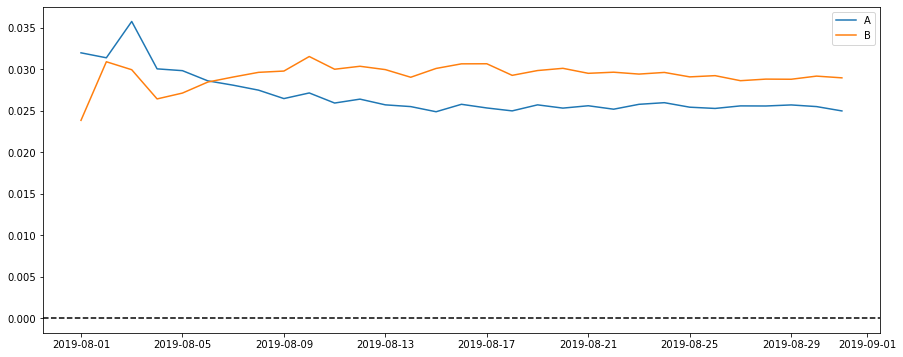

In [74]:
#calculating each group's cumulative conversion rate  
##Plotting the daily conversion rates of the two groups. 

plt.plot(group_a['date'], group_a['conversion'], label='A')
plt.plot(group_b['date'], group_b['conversion'], label='B')
plt.axhline(y=0.0, color='black', linestyle='--') 
plt.legend()



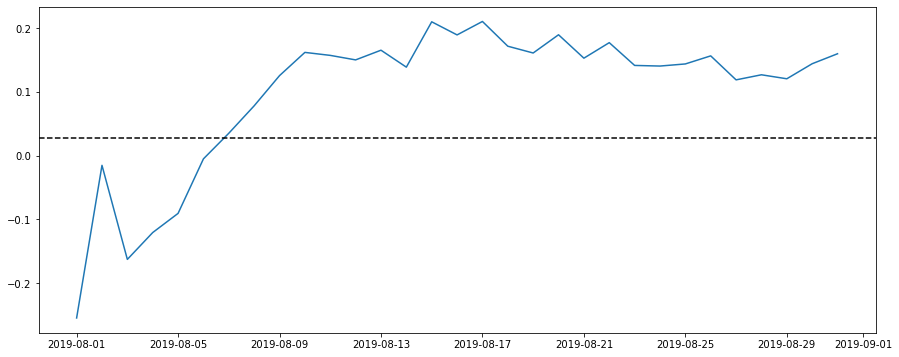

In [75]:
#Graphing the relative difference in cumulative conversion  for group B compared with group A.

plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['conversionB']/(mergedCumulativeRevenue['conversionA'])-1))

plt.axhline(y=cumulativeData['conversion'].mean(), color='black', linestyle='--') 

We can see from this graph that after both groups convertion rates Stabilise, groups B convertion rates are higher then group A all the way till the end of the test. 

Next, I want to plot a scatter chart of orders per user, and order prices. I will also use thge percentile method to detrmine who are the outliers in those fields so i could filter them out later and see what changed.

In [76]:
##calculating the 95th and 99th percentiles for the number of orders per user.

orders_per_user = (
    clean_orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
orders_per_user.columns = ['visitorId', 'orders']

print(orders_per_user.sort_values(by='orders', ascending=False).head(10))
print("The outliers are :",np.percentile(orders_per_user['orders'], [ 95,99]),"orders per user")



      visitorId  orders
908  3967698036  3     
55   249864742   3     
478  2108163459  3     
687  2988190573  3     
890  3908431265  3     
138  611059232   3     
632  2742574263  3     
157  678354126   2     
323  1404560065  2     
452  1985475298  2     
The outliers are : [1. 2.] orders per user


In [77]:
orders_per_outliers = 1.9


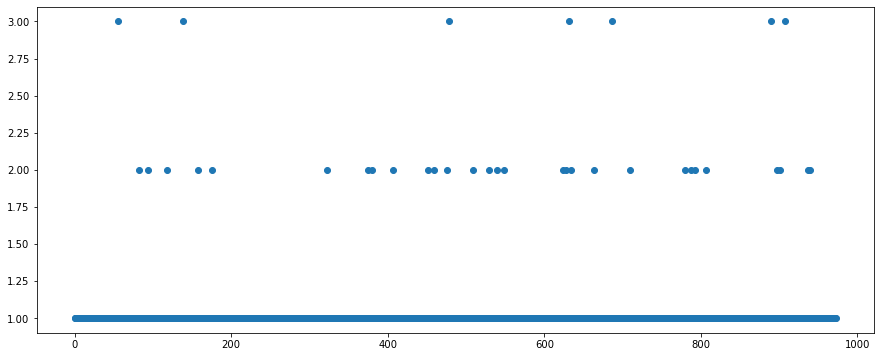

In [78]:
#Plotting a scatter chart of the number of orders per user

scat_o = pd.Series(range(0,len(orders_per_user)))

plt.scatter(scat_o, orders_per_user['orders']) 


We can see the vast majority of the users made less then 4 orders. The users that made more then 4 orders will be considered as outliers.

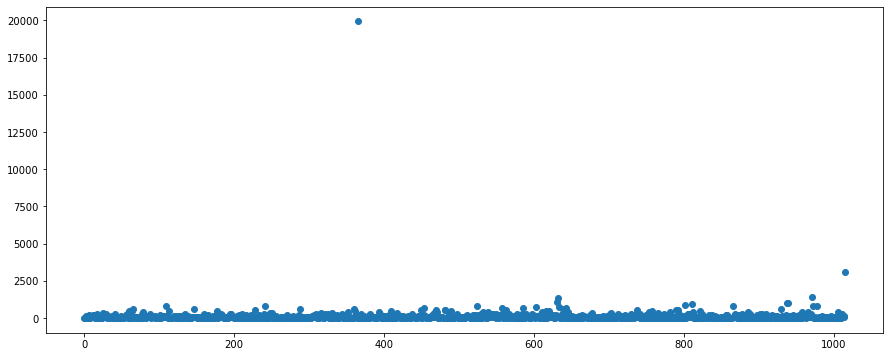

In [79]:
#Plotting a scatter chart of order prices.
scat_price = pd.Series(range(0,len(clean_orders)))

plt.scatter(scat_price, clean_orders['revenue']) 

In [80]:
#Calculating the 95th and 99th percentiles of order prices
print("The orders price outliers are :",np.percentile(orders['revenue'], [95,97, 99])) 


The orders price outliers are : [435.54  550.9   900.904]


In [81]:
orders_price_outliers = 900.903

We can see the vast majority of the orders price less  550 orders. The users that made orders higher than that will be considered as outliers.

Next, I want to get the user ids with too many orders and users with too expensive orders. I will use this to filter the outliers i just found

In [33]:
#Splitting the users into groups 
ordersByUsersA = (
    clean_orders[clean_orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    clean_orders[clean_orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']
#getting users with too many orders 
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > orders_per_outliers]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > orders_per_outliers]['visitorId'],
    ],
    axis=0,
)
#getting the users with pricy orders
usersWithExpensiveOrders = clean_orders[clean_orders['revenue'] > orders_price_outliers]['visitorId']
#getting all of the users i found into one list  
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

abnormalUsers.head(5)

1099    148427295
33      249864742
36      366673373
51      406208401
67      522292794
Name: visitorId, dtype: int64

In [34]:
clean_orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B


In [35]:
clean_orders_per_user = (
    clean_orders.query('revenue < @orders_price_outliers').drop(['group', 'date','revenue'], axis=1)
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
clean_orders_per_user.columns = ['visitorId', 'orders']
clean_orders_per_user = clean_orders_per_user.query('orders < @orders_per_outliers')

print(clean_orders_per_user.sort_values(by='orders', ascending=False).head(10))



      visitorId  orders
0    5114589     1     
646  2846507753  1     
634  2776274025  1     
635  2785040378  1     
636  2785527055  1     
637  2801638130  1     
638  2803209166  1     
639  2805132315  1     
640  2819072957  1     
641  2819363575  1     


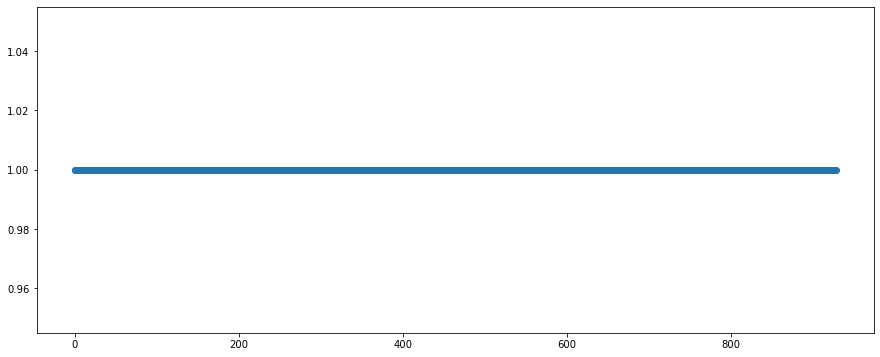

In [36]:
#Plotting a scatter chart of the number of orders per user without outliers

clean_orders_per_user_scat = pd.Series(range(0,len(clean_orders_per_user)))

plt.scatter(clean_orders_per_user_scat, clean_orders_per_user['orders']) 


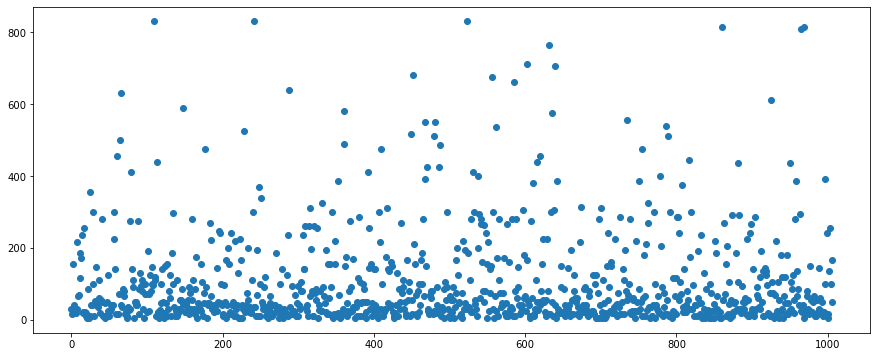

In [37]:
#Plotting a scatter chart of order prices without outliers
clean_scat_price = pd.Series(range(0,len(clean_orders.query('revenue < @orders_price_outliers'))))

plt.scatter(clean_scat_price, clean_orders.query('revenue < @orders_price_outliers')['revenue'])

Next, I want to find the statistical significance of the difference in conversion between the groups using the raw data and compare the findings to the statistical significance of the difference in conversion between the groups using the filterd data.


In order to do that will formulate two hypotheses - A null hypitheses H0, and the alternative hypothesis- H1, and will perform a Wilcoxon–Mann–Whitney  test. 

A Mann-Whitney U test is used to compare the differences between two samples when the sample distributions are not normally distribute.

In order to determine whether to reject the null hypothesis or not
We set a threshold for statistical significance - critical statistical significance level alpha, wich will be 0.05.
if the p-value is less than alpha, we reject the null hypothesis -H0

The hypotheses:

H0: The difference between group A conversion rate and group B conversion rate is statistically significant.

H1: We cant say that the difference between group A conversion rate and group B conversion rate is statistically significant.




In [38]:

alpha = 0.05 


results = st.mannwhitneyu(group_a['conversion'], group_b['conversion'])

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print("Null hypothesis rejected: the difference is statistically significant")
else:
    print("Failed to reject the null hypothesis: we can't make conclusions about the difference") 
print('the relative differnce between group B and group A group_b is : {0:.3f}'.format(group_b['conversion'].median()/group_a['conversion'].median()-1)) 


p-value:  7.248330876119314e-06
Null hypothesis rejected: the difference is statistically significant
the relative differnce between group B and group A group_b is : 0.148


From the test we just performed on thw raw data, we can say that H0 s correct - the difference is statistically significant between the conversion of the two groups.

The first row of the output gives us the p-value, 1.4496661752238628e-05, which is much smaller than 0.05. So we can reject the null hypothesis that there's not a statistically significant difference in conversion between the groups.  The relative gain of group B is 14.8% (the third row of the output).

Next, i want to perform the same test on the filterd data, and see if something changes.



In [39]:
#filtering the data 
filtered_orders =clean_orders[~clean_orders['visitorId'].isin(abnormalUsers)]

#splitting the filtered data inrto groups 
filtered_a = filtered_orders[filtered_orders['group'] =='A']
filtered_b = filtered_orders[filtered_orders['group'] =='B']

filtered_a.head()



,transactionId,visitorId,date,revenue,group
7,2626614568,78758296,2019-08-15,20.1,A
8,1576988021,295230930,2019-08-15,215.9,A
10,3649131742,879864040,2019-08-15,65.7,A
12,2809384911,3213223594,2019-08-15,115.4,A
14,3859315276,1565034404,2019-08-15,170.9,A


In [40]:
#getting the data  into the grouped version of it so i could make comparisons between the groups
grouped_filterd_a = filtered_a.groupby(['date']).agg({'revenue' : 'sum','transactionId' : pd.Series.nunique,'visitorId' : pd.Series.nunique}).reset_index()
grouped_filterd_a.columns = ['date','revenue','orders_per_day','users_per_day']
grouped_filterd_a.head()



,date,revenue,orders_per_day,users_per_day
0,2019-08-01,1427.4,15,15
1,2019-08-02,762.2,15,15
2,2019-08-03,1815.2,24,24
3,2019-08-04,669.8,10,10
4,2019-08-05,1287.5,20,20


In [41]:
grouped_filterd_b = filtered_b.groupby(['date']).agg({'revenue' : 'sum','transactionId' : pd.Series.nunique,'visitorId' : pd.Series.nunique}).reset_index()
grouped_filterd_b.columns = ['date','revenue','orders_per_day','users_per_day']
grouped_filterd_b.head()



,date,revenue,orders_per_day,users_per_day
0,2019-08-01,967.2,17,17
1,2019-08-02,2432.3,20,20
2,2019-08-03,1071.6,14,14
3,2019-08-04,1330.9,12,12
4,2019-08-05,1449.3,21,21


In [42]:
#merging the df with the visits df for further calculations 
grouped_filterd_a = grouped_filterd_a.merge(visits[visits['group'] == 'A'],on = ['date'],how = 'outer')
grouped_filterd_b = grouped_filterd_b.merge(visits[visits['group'] == 'B'],on = ['date'],how = 'outer')
grouped_filterd_a.head()

,date,revenue,orders_per_day,users_per_day,group,visits
0,2019-08-01,1427.4,15,15,A,719
1,2019-08-02,762.2,15,15,A,619
2,2019-08-03,1815.2,24,24,A,507
3,2019-08-04,669.8,10,10,A,717
4,2019-08-05,1287.5,20,20,A,756


In [43]:
#adding a conversion column as the ratio of orders / visits
grouped_filterd_a['conversion'] = grouped_filterd_a['orders_per_day'] / grouped_filterd_a['visits']
grouped_filterd_b['conversion'] = grouped_filterd_b['orders_per_day'] / grouped_filterd_b['visits']
grouped_filterd_b.head()

,date,revenue,orders_per_day,users_per_day,group,visits,conversion
0,2019-08-01,967.2,17,17,B,713,0.023843
1,2019-08-02,2432.3,20,20,B,581,0.034423
2,2019-08-03,1071.6,14,14,B,509,0.027505
3,2019-08-04,1330.9,12,12,B,770,0.015584
4,2019-08-05,1449.3,21,21,B,707,0.029703


Now after everything is set, I want to find the statistical significance of the difference in conversion between the groups using the filterd data.


Like i did with the raw data, I  will formulate two hypotheses - A null hypitheses H0, and the alternative hypothesis- H1, and will perform a Wilcoxon–Mann–Whitney  test. 


In order to determine whether to reject the null hypothesis or not
We set a threshold for statistical significance - critical statistical significance level alpha, wich will be 0.05.
if the p-value is less than alpha, we reject the null hypothesis -H0

The hypotheses:

H0: The difference between the filterd group A conversion rate and the filterd group B conversion rate is statistically significant.

H1: We cant say that the difference between the filterd group A conversion rate and the filterd group B conversion rate is statistically significant.


In [44]:

alpha = 0.05 


results = st.mannwhitneyu(grouped_filterd_a['conversion'], grouped_filterd_b['conversion'])

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print("Null hypothesis rejected: the difference is statistically significant")
else:
    print("Failed to reject the null hypothesis: we can't make conclusions about the difference") 
print('the relative differnce between group B and group A group_b is : {0:.3f}'.format(grouped_filterd_b['conversion'].median()/grouped_filterd_a['conversion'].median()-1)) 


p-value:  0.019915482598469605
Null hypothesis rejected: the difference is statistically significant
the relative differnce between group B and group A group_b is : 0.385


From the test we just performed on thw filterd data, we can say that H0 s correct - the difference is statistically significant between the conversion of the two groups.

The first row of the output gives us the p-value, 0.03983096519693921, which is  smaller than 0.05. So we can reject the null hypothesis that there's not a statistically significant difference in conversion between the groups.  The relative gain of group B is 38.5% (the third row of the output).



Next, I want to find the statistical significance of the difference in average purchase size between the groups using the raw data and compare the findings to the statistical significance of the difference in average order size between the groups using the filterd data.

Raw data - The hypotheses:

H0: The difference between group A average purchase size  and group B average purchase size is statistically significant.

H1: We cant say that the difference between group A average purchase size and group B average purchase size is statistically significant.

in order to test those hypotheses about the groups average purchase size, i have created a function that will use the shapiro test to check if distribution of the data we are checking is normal.
if so, a ttest will be conducted( after a t.levene test in order to detemine how to set the equal_var in the ttest). 

if not- a mannwhitneyu test will be conducted as beforee.


In [45]:
def testing_average(sample1,sample2,alpha =0.05):
    
    sample1 = sample1.dropna()
    sample2 = sample2.dropna()
    stat1, p1_norm = st.shapiro(sample1)
    stat2, p2_norm = st.shapiro(sample2)

    if p1_norm > alpha and p2_norm > alpha:  
        
    
    #then both normal, perform t-test
    # for t test  also should check equality of  variances 
        statslev,p_levene = st.levene(sample1, sample2)
        if p_levene < alpha:
            
            statist,p_value = st.ttest_ind(sample1, sample2,equal_var = False)
        else:
        
             statist,p_value = st.ttest_ind(sample1, sample2,equal_var = True)
    else:
        statist,p_value = st.mannwhitneyu(sample1, sample2)
                                          
    print(p_value)
    if p_value < alpha:
        
        
        print("Rejecting the null hypothesis: there is a significant difference between the proportions")                                                      
    else:
        
        
                                      
        print("Failed to reject the null hypothesis: there is no reason to consider the proportions different")

    print('the relative differnce between group B and group A group_b is : {0:.3f}'.format(sample1.mean()/sample2.mean()-1)) 




In [46]:

group_a['avg_purchase'] = group_a['revenue'] / group_a['orders_per_day']
group_b['avg_purchase'] = group_b['revenue'] / group_b['orders_per_day']




In [47]:
testing_average(group_a.avg_purchase,group_b.avg_purchase,alpha =0.05) 



0.4775457158686006
Failed to reject the null hypothesis: there is no reason to consider the proportions different
the relative differnce between group B and group A group_b is : -0.165


In [48]:

grouped_filterd_a['avg_purchase'] = grouped_filterd_a['revenue'] / grouped_filterd_a['orders_per_day']
grouped_filterd_b['avg_purchase'] = grouped_filterd_b['revenue'] / grouped_filterd_b['orders_per_day']
grouped_filterd_a.head()


testing_average(grouped_filterd_a.avg_purchase,grouped_filterd_b.avg_purchase,alpha =0.05)

0.9261905382178917
Failed to reject the null hypothesis: there is no reason to consider the proportions different
the relative differnce between group B and group A group_b is : 0.009


We can see that there isn't a significant differnce in averge purchase size between group A and B, using raw data or filterd data.

## conclusion: 
1. There's a statistically significant difference in conversion between the groups, according to both the raw and the filtered data.
The graph of the difference in conversion between the groups shows that group B's results are better than those of group A.
2. The raw data and the filterd didn't show a statistically significant difference between the groups in terms of average purchase size.


I would recommend to stop the test. There is no reason to think that group a will catch up to group b regarding conversion rates, and the probability of getting a significant differnce is realy small, with p_value of 0.491, way above our alpha threshold. 

I would call group B as the winner of the test, regarding conversion. If the company is more interested with average purchase size, there isnt a statistical way of calling a winner due to the conclusions i mentioned.  